In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras import layers, regularizers, models, optimizers, losses, callbacks, metrics

2025-11-04 03:23:08.385833: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-04 03:23:08.472860: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762222988.499848  167184 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762222988.506547  167184 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762222988.980047  167184 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
# Columns
# has_diabetes: 0/1 (TARGET)
# age: integer
# sex: male/female
# hypertension: yes/no
# Enferemedad_vascular: yes/no
# Smoker: yes/no
# bmi: decimal
# Hba1c_cuan: decimal
# Hba1c_cual: normal/not normal
# random_glucose: decimal (maybe into cuantified/cualified setup)

## Entrenamiento del modelo

In [3]:
val_train_df = pd.read_csv('train_data_with_sentiment.csv', index_col=0)
test_df = pd.read_csv('test_data_with_sentiment.csv', index_col=0)
val_train_df.head()

,has_diabetes,sentiment,score
patient_id,,,
82555,0,0,0.964545
92299,0,0,0.979719
18725,0,1,0.628050
52208,1,0,0.810922
2640,0,0,0.936839


In [4]:
val_df = val_train_df.sample(frac=0.2, random_state=42)
train_df = val_train_df.drop(val_df.index)

In [5]:
x_val = val_df.drop(columns=['has_diabetes'])
y_val = val_df['has_diabetes']
x_train = train_df.drop(columns=['has_diabetes'])
y_train = train_df['has_diabetes']

In [13]:
activation = 'swish'  # Funciona muy bien en general
l_norm = 1e-10
model = models.Sequential(layers=[
    layers.Input(shape=x_train.shape[1:]),
    layers.Dense(64, activation=activation, kernel_regularizer=regularizers.l2(l_norm)),
    layers.Dense(64, activation=activation, kernel_regularizer=regularizers.l2(l_norm)),
    layers.Dense(32, activation=activation, kernel_regularizer=regularizers.l2(l_norm)),
    layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(l_norm))
])

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss=losses.BinaryCrossentropy(),
    metrics=[
        metrics.BinaryAccuracy(name='accuracy', threshold=0.5),
    ]
)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,465 (25.25 KB)

 Trainable params: 6,465 (25.25 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(x_train.values, y_train.values.reshape(-1, 1), epochs=100, batch_size=32, validation_split=0.2,
                    callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=False)])
print()
print('Training accuracy:', history.history['accuracy'][-1])
print()
print('Validation accuracy:', history.history['val_accuracy'][-1])

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7073 - loss: 0.6699 - val_accuracy: 0.7354 - val_loss: 0.6493
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7073 - loss: 0.6414 - val_accuracy: 0.7354 - val_loss: 0.6181
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7073 - loss: 0.6191 - val_accuracy: 0.7354 - val_loss: 0.5943
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7073 - loss: 0.6080 - val_accuracy: 0.7354 - val_loss: 0.5835
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7073 - loss: 0.6045 - val_accuracy: 0.7354 - val_loss: 0.5801
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7073 - loss: 0.6034 - val_accuracy: 0.7354 - val_loss: 0.5787
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7073 - loss: 0.6031 - val_accuracy: 0.7354 - val_loss: 0.5782
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7073 - loss: 0.6029 - val_accuracy: 0.7354 - 

In [15]:
model.evaluate(x_val, y_val.values.reshape(-1, 1), batch_size=32)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6483 - loss: 0.6521


[0.6520974636077881, 0.6483333110809326]

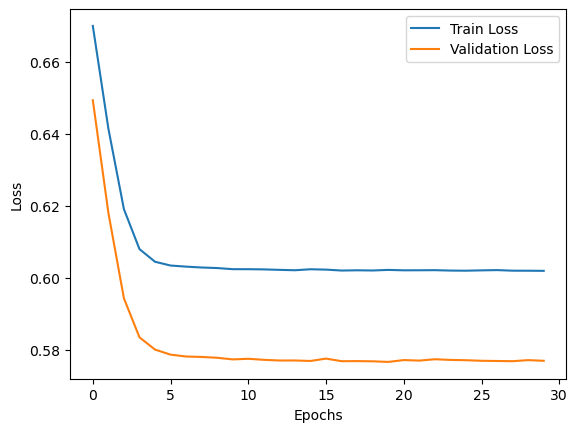

In [16]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Inferencia del modelo

In [ ]:
x_test = test_df.copy()
predictions = model.predict(x_test)
x_test['has_diabetes'] = (predictions >= 0.5).astype(int)
x_test[['has_diabetes']].to_csv('predictions.csv', index=True)